# Applied Group Project


## Part 1

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

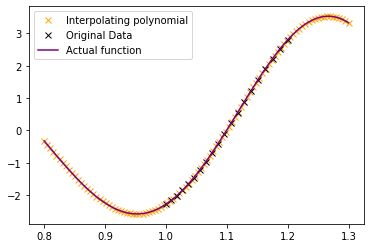

In [131]:
def PiecewisePoly(Ndeg, x0, y0, x_j):                      
    MM = Ndeg + 1                                          # degree + 1 = number of points to find
    N_interpolant = len(x0) - Ndeg                         # number of polynomials to get 
    pts = np.arange(Ndeg+1) + np.arange(N_interpolant).reshape(N_interpolant,1)  # small set of x points
    
    a = np.zeros((Ndeg+1,N_interpolant))
    pows = (MM-1-np.arange(MM)).reshape(MM,1)         
    
    for i in range(N_interpolant):
        A = np.vander(x0[pts[i,:]])
        a[:,i] = np.linalg.solve(A,y0[pts[i,:]])     #vander + solving for small set of x points
    
    y = np.empty_like(x_j) 
    pows = Ndeg-np.arange(MM)                        #putting powers in correct order
    
    for n in range(len(x_j)):
        if((x_j[n]<x0).all()):
            k=0
        elif((x_j[n]>x0).all()):
            k=len(x0)-1
        else:             # find k for x_i, accounting for the possibility that x_i=x_k
            k = np.where(((x_j[n]<x0[1:]) & (x_j[n]>=x0[:-1])) | 
                         ((x0[1:]==x_j[n]) & (x_j[n]>x0[:-1])))[0][0]
     
        j = k - Ndeg//2    
        j = max(0,j)
        j = min(j,N_interpolant-1)
        
        y[n] = np.sum(a[:,j]*x_j[n]**pows)  # obtain new data point
        
    return y

# Testing our function with a given function and uneven data points. 
def f(x):
    return np.exp(x)*np.cos(10*x)

N = 20
r0 = np.linspace(0,1/6,N)

x1 = 1/(1-r0) # coordinate transformation to test uneven spacing
y1 = f(x1)

# Evaluation points
x2 = np.linspace(0.8,1.3,100)

Y = PiecewisePoly(10, x1, y1, x2)

# Plotting our Piecewise polynomial and comparingit to the actual function
plt.plot(x2, Y, "x", color = "orange",label="Interpolating polynomial")
plt.plot(x1, y1, "x", color = "black",label="Original Data")
plt.plot(x2, f(x2), color = "purple",label="Actual function")
plt.legend()

## Part 2

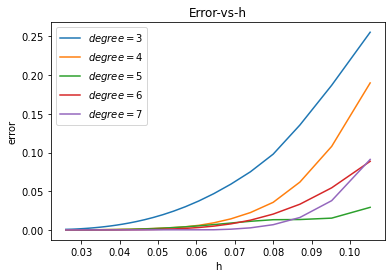

In [190]:
# Creating a funciton to return the maximum error 
def error_function(N, f, a, b, deg):
    
    x1 = np.linspace(a, b, N)
    y1 = f(x1)
 
    evalpts = np.linspace(a, b, 100)
    
    # deleting points in evalpts if they are equal to x1
    for i in range(len(x1)):
        if (evalpts[i] == x1[i]):
            np.delete(evalpts, i)

    Y = PiecewisePoly(deg, x1, y1, evalpts)
    
    max_error = max(abs(f(evalpts) - Y))
    
    return max_error


# Function to plot the error considering degree of the piecewise poly
def PlotError(deg):
    X = []
    Y = [] 
    for N in range(20, 80, 2):
    
        a = 0
        b = 2
    
        h = (b-a)/(N-1)
    
        X.append(h)
        Y.append(error_function(N, f, a, b, deg))
    
    plt.plot(X, Y,label=f'$degree={deg}$')
    plt.xlabel("h")
    plt.ylabel("error")
    plt.title("Error-vs-h")

# Plotting degrees 3 to 7
for i in range(3, 8):
    PlotError(i)
    plt.legend()